## Importation

In [215]:
import pandas as pd
import numpy as np
import os

data_path = "./../data"
dataset_name = "train.csv"

dataset = os.path.join(data_path, dataset_name)

import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition', 'SalePrice']


df_all = pd.read_csv(dataset, usecols= import_col, index_col='Id')

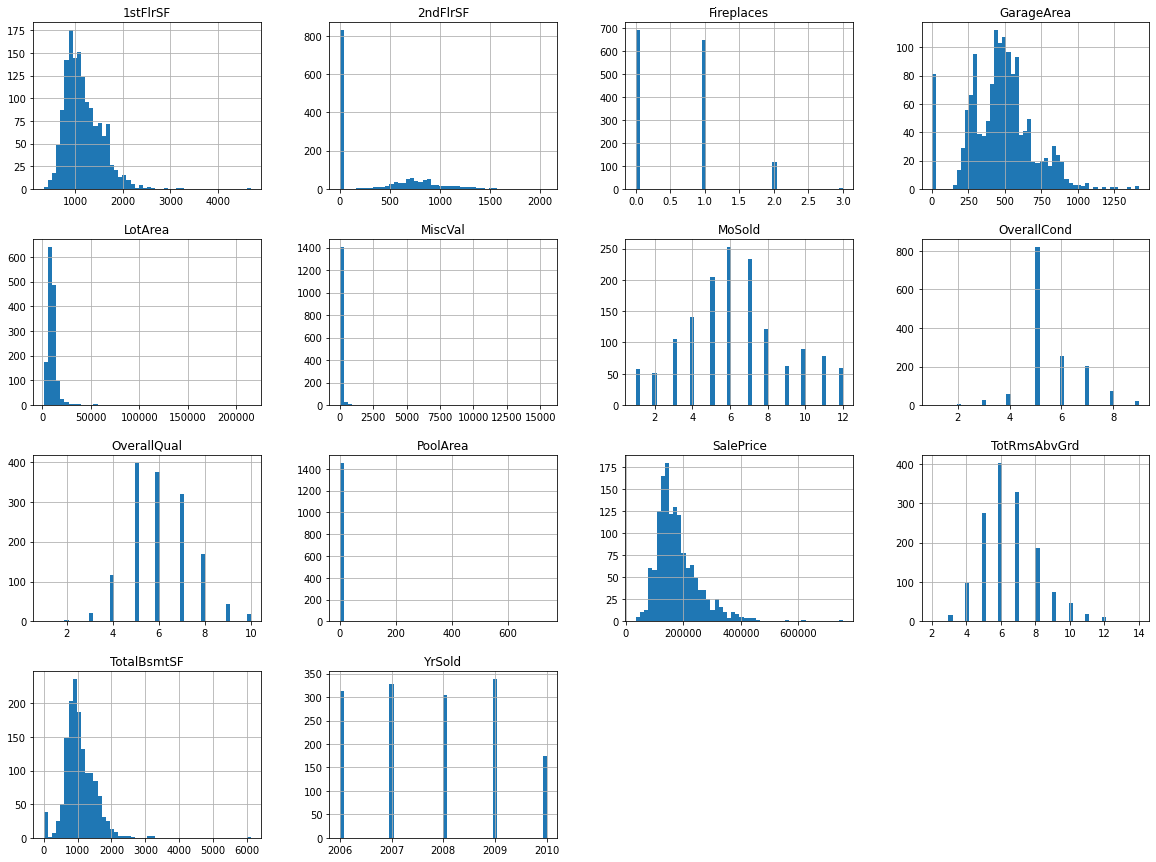

In [216]:
# visualise numerical data.
import matplotlib.pyplot as plt
df_all.hist(bins = 50, figsize=(20,15))
plt.show()


In [211]:
# Check for Nan.
df_all.isnull().sum()

MSZoning            0
LotArea             0
Neighborhood        0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
PoolArea            0
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

## Change simple qualitative features to number

In [212]:
# transform 'Y' and 'N' of the columns 'CentralAir' into 0 and 1.
d = {'Y' : 1, 'N' : 0}
df_all["CentralAir"].replace(to_replace = d, inplace =True)

# Transform the Excellent, Good, Typical/Average, Fair and Poor values to 
# numerate values : 5, 4, 3, 2 and 1 in the column KitchenQual.
d = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa': 2, 'Po': 1}
df_all["KitchenQual"].replace(to_replace = d, inplace =True)

## Split into test and train

<font color='green'>why ? Justify or use train test split from scikit learn !</font>

In [213]:
# Split df into train and test DataFrames
from preprocessing import selectTestTrainSetId

train_id, test_id = selectTestTrainSetId(df_all.index, 0.2)
df_train = df_all.loc[train_id]
df_test = df_all.loc[test_id]

y_train = df_train.SalePrice
y_test = df_test.SalePrice

## Features

In [133]:
# Qualitative data :

# MSZoning: Identifies the general zoning classification of the sale.
# Neighborhood: Physical locations within Ames city limits
# MiscFeature: Miscellaneous feature not covered in other categories
# SaleType: Type of sale
# SaleCondition: Condition of sale  
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

qual_col = ['MSZoning', 'Neighborhood', 'MiscFeature','SaleType', 
            'SaleCondition' , 'MoSold', 'YrSold',]

# Quantitative data : 

# LotArea: Lot size in square feet              
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# TotalBsmtSF: Total square feet of basement area
# CentralAir: Central air conditioning
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageArea: Size of garage in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature

quant_col = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']

# To estimate :

# SalePrice: price of sale

to_predict_col = ['SalePrice']


In [134]:
features_col = quant_col + to_predict_col
df_quant = df_train[features_col]    

## Correlation

In [135]:
corr_matrix = df_quant.corr()
corr_matrix

,LotArea,OverallQual,OverallCond,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
LotArea,1.000000,0.099127,-0.004369,0.263559,0.044895,0.293765,0.044687,0.056101,0.182195,0.276617,0.171145,0.077747,0.040498,0.249049
OverallQual,0.099127,1.000000,-0.094453,0.550327,0.280070,0.484251,0.275601,0.667292,0.408470,0.406775,0.548379,0.067708,-0.023296,0.783971
OverallCond,-0.004369,-0.094453,1.000000,-0.169475,0.140768,-0.139230,0.043562,-0.033644,-0.035574,-0.002306,-0.149388,0.015798,0.080098,-0.079830
TotalBsmtSF,0.263559,0.550327,-0.169475,1.000000,0.212698,0.823218,-0.162100,0.437625,0.301794,0.343984,0.489712,0.152513,-0.006869,0.617705
CentralAir,0.044895,0.280070,0.140768,0.212698,1.000000,0.135394,-0.015680,0.257526,0.024975,0.195978,0.223034,0.015333,0.017402,0.257379
1stFlrSF,0.293765,0.484251,-0.139230,0.823218,0.135394,1.000000,-0.192623,0.389228,0.419137,0.417107,0.493987,0.168435,-0.011080,0.612494
2ndFlrSF,0.044687,0.275601,0.043562,-0.162100,-0.015680,-0.192623,1.000000,0.158839,0.613777,0.192097,0.127908,0.066126,0.008898,0.305870
KitchenQual,0.056101,0.667292,-0.033644,0.437625,0.257526,0.389228,0.158839,1.000000,0.282229,0.252714,0.472252,0.081282,-0.045124,0.651201
TotRmsAbvGrd,0.182195,0.408470,-0.035574,0.301794,0.024975,0.419137,0.613777,0.282229,1.000000,0.333149,0.328380,0.067858,0.017678,0.522717
Fireplaces,0.276617,0.406775,-0.002306,0.343984,0.195978,0.417107,0.192097,0.252714,0.333149,1.000000,0.270197,0.090407,0.007371,0.483097


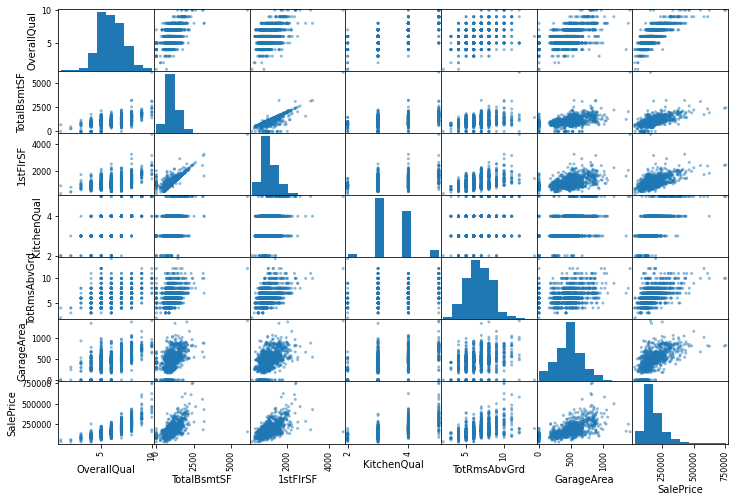

In [136]:
# Scatter matrix for feature well correlated with the price.
from pandas.plotting import scatter_matrix

t = 0.5
to_visualize = [c for c in corr_matrix.columns if corr_matrix[c]['SalePrice'] > t]

scatter_matrix(df_quant[to_visualize], figsize = (12,8))
plt.show()

The prices over 50000 is being removed since it is rare and not following the general slope.

In [168]:
price_ceiling = 500000
#price_ceiling = 600000
id_high_price = [i for i in df_train.index if df_train["SalePrice"][i] > price_ceiling]
df_train = df_train.drop(id_high_price , axis = 0)
y_train = y_train.drop(id_high_price , axis = 0)


## Feature ingineering

In [169]:
# Transform the square feet of the second floor into existence of a second floor.
# Could add criminality data to the dataset.
# Split garage area into two feature : existence of a garage and the area (normalised), is this perform better ?
# Transform the miscVal into the existence of the value or not.

## Preprocessing

In [170]:
quant_col = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']


feature_to_encod = ["MSZoning", "Neighborhood", "SaleCondition", "MiscFeature"]
feature_to_encod = ["MSZoning", "SaleCondition"]
#feature_to_encod = ["SaleCondition"]

features = quant_col + feature_to_encod

df_train_unprepared = df_train[features]
df_test_unprepared = df_test[features]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
from preprocessing import OneHotEncodTransformer

preprocess_pipeline = Pipeline([
                                ('one_hot_encoder', 
                                 OneHotEncodTransformer(feature_to_encod)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('std_scaler', StandardScaler()),
                     ])

preprocess_pipeline.fit(df_train_unprepared)


X_train = preprocess_pipeline.transform(df_train_unprepared)
X_test = preprocess_pipeline.transform(df_test_unprepared)

## Linear model

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print("scores : ", scores)
print("mean score : ", scores.mean())

scores :  [-29815.93530191 -28222.95915137 -30594.87054905 -41903.09391666
 -38264.86730049 -25765.05548263 -26944.49770523 -28124.13500133
 -58813.33276334 -40298.26169577]
mean score :  -34874.70088677868


In [172]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict_train = reg.predict(X_train)

RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print(RMSE)

32838.13408239837


In [173]:
# Check if the linear model perform well on the test set. 
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print(RMSE)

34050.19456978512


Let study the difference between the predicted prices and the real price on the train set. Let's study the correlation between the overestimation of the price and other features.

In [174]:
# Add a overprice column to the dataframe. 
overprice = y_predict_train - y_train
overprice.name = "Overprice"
df_overprice = pd.concat([df_train_unprepared, overprice, y_train], axis = 1)

df_overprice.corr()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,Overprice,SalePrice
LotArea,1.000000e+00,8.858158e-02,-2.741360e-03,2.590736e-01,4.379643e-02,2.899575e-01,3.461765e-02,4.926925e-02,1.756090e-01,2.740644e-01,1.652203e-01,8.060718e-02,4.101494e-02,1.483379e-16,0.248076
OverallQual,8.858158e-02,1.000000e+00,-9.068076e-02,5.314793e-01,2.816255e-01,4.633316e-01,2.614057e-01,6.583046e-01,3.882266e-01,3.946784e-01,5.378476e-01,3.544066e-02,-2.250910e-02,9.440845e-16,0.792954
OverallCond,-2.741360e-03,-9.068076e-02,1.000000e+00,-1.676900e-01,1.415206e-01,-1.367518e-01,4.619034e-02,-2.944790e-02,-3.063642e-02,6.411529e-04,-1.467409e-01,2.527230e-02,7.997029e-02,1.961410e-16,-0.075890
TotalBsmtSF,2.590736e-01,5.314793e-01,-1.676900e-01,1.000000e+00,2.138016e-01,8.153199e-01,-1.903201e-01,4.187100e-01,2.764975e-01,3.274507e-01,4.784747e-01,1.312303e-01,-5.666223e-03,2.733944e-16,0.599949
CentralAir,4.379643e-02,2.816255e-01,1.415206e-01,2.138016e-01,1.000000e+00,1.342485e-01,-1.829061e-02,2.578159e-01,2.168346e-02,1.952882e-01,2.228165e-01,1.333069e-02,1.753607e-02,3.943964e-16,0.276563
1stFlrSF,2.899575e-01,4.633316e-01,-1.367518e-01,8.153199e-01,1.342485e-01,1.000000e+00,-2.227358e-01,3.686841e-01,3.994349e-01,4.033585e-01,4.816992e-01,1.459451e-01,-1.001991e-02,3.727413e-16,0.595434
2ndFlrSF,3.461765e-02,2.614057e-01,4.619034e-02,-1.903201e-01,-1.829061e-02,-2.227358e-01,1.000000e+00,1.484174e-01,6.154576e-01,1.842425e-01,1.168847e-01,1.681781e-02,9.773337e-03,1.008304e-15,0.280742
KitchenQual,4.926925e-02,6.583046e-01,-2.944790e-02,4.187100e-01,2.578159e-01,3.686841e-01,1.484174e-01,1.000000e+00,2.615462e-01,2.384971e-01,4.602826e-01,5.879443e-02,-4.473035e-02,3.938037e-16,0.657175
TotRmsAbvGrd,1.756090e-01,3.882266e-01,-3.063642e-02,2.764975e-01,2.168346e-02,3.994349e-01,6.154576e-01,2.615462e-01,1.000000e+00,3.208664e-01,3.113651e-01,4.602736e-02,1.912126e-02,9.856070e-16,0.504698
Fireplaces,2.740644e-01,3.946784e-01,6.411529e-04,3.274507e-01,1.952882e-01,4.033585e-01,1.842425e-01,2.384971e-01,3.208664e-01,1.000000e+00,2.609245e-01,7.061795e-02,8.161981e-03,9.162700e-16,0.483548


The correlation between overprice and other features than the price is almost zero, i.e. that the linear model did his job to uses linear relations between those features and the price.

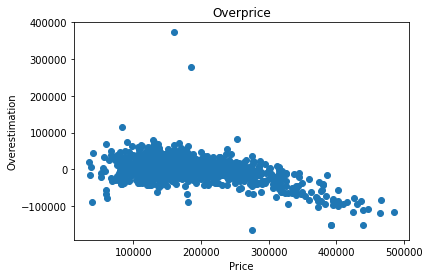

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_train, overprice)

ax.set(xlabel='Price', ylabel='Overestimation',
       title='Overprice')

plt.show()

The higher the price is the more the model underestimate the price. This suggest that a linear model could be unadapted. Since the performance on the test set is better than on the train set we know that the linear regression does not overfit. We will try polynomial regression as a more complex model.

## Polynomial Regression

In [176]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


model = LinearRegression()
#model.fit(X_train, y_train)

scores = cross_val_score(model, X_train_poly, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print(scores, scores.mean())


[-2.30281447e+04 -2.55384606e+04 -9.65127372e+04 -5.18476103e+04
 -3.47632633e+04 -1.25159058e+17 -6.00406580e+04 -2.46107215e+04
 -3.05376320e+17 -2.72396611e+04] -4.305353781494334e+16


In [177]:
# Still bad, but learned, need more values !
from sklearn.metrics import mean_squared_error 
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_predict = model.predict(X_test_poly)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)


y_predict_train = model.predict(X_train_poly)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  30185.92744301336
RMSE on train :  23601.108658332334


At the degre 2 the result of the prediction is better than with the linear regression. Nevertheless, since the score is much better on train than on the test we can conclude that the model overftit. We should introduce more regulation to reduce variance and improve the model. (Here we don't have more data to deal with the overfit.)

<font color='green'> Try more regulation on the polynomial model ! </font>

## Random forest

In [178]:
from sklearn.ensemble import RandomForestRegressor
params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

RF_reg = RandomForestRegressor(**params)

scores = cross_val_score(RF_reg, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
print("scores : ", scores)
print("mean score : ", scores.mean())

scores :  [-32892.92425479 -29451.81513996 -32280.12075601 -35777.938906
 -38170.53340732 -24351.57599098 -26965.9048272  -27839.99193734
 -33404.00827014 -30286.72865861]
mean score :  -31142.1542148339


In [179]:
# The model slighly ovefit since train is better than test. No much.
from sklearn.metrics import mean_squared_error 
RF_reg = RandomForestRegressor(**params)
RF_reg.fit(X_train, y_train)

y_predict = RF_reg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)

y_predict_train = RF_reg.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  32436.717406666266
RMSE on train :  24704.575507204932


In [180]:
# can take few minutes on my compute.
from sklearn.model_selection import GridSearchCV

GRID_SEARCH = True

model = RandomForestRegressor()

param_grid = {
        'n_estimators' : [3,10,30,100], 
        'max_depth' : [2,3,4,5],
        'min_samples_split' : [2,5,10,20]  
  }

if GRID_SEARCH:
    
    grid_search = GridSearchCV(model, param_grid)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


example of result : {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

## Gradient boosting

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(**params, learning_rate = 0.4)
gbrt.fit(X_train, y_train)

y_predict = gbrt.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_predict, y_test.values))
print("RMSE on test : ", RMSE)

y_predict_train = RF_reg.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_predict_train, y_train.values))
print("RMSE on train : ", RMSE)

RMSE on test :  33724.47776550278
RMSE on train :  24704.575507204932


## Testing on Kaggle

In [31]:
data_path = "./../data"
dataset_name = "test.csv"

dataset = os.path.join(data_path, dataset_name)

import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition']


df_val = pd.read_csv(dataset, usecols= import_col, index_col='Id')
indices = df_val.index

In [32]:
## This (and his friends) should be in the preprocessing pipeline !!!!!

# transform 'Y' and 'N' of the columns 'CentralAir' into 0 and 1.
d = {'Y' : 1, 'N' : 0}
df_val["CentralAir"].replace(to_replace = d, inplace =True)

# Transform the Excellent, Good, Typical/Average, Fair and Poor values to 
# numerate values : 5, 4, 3, 2 and 1 in the column KitchenQual.
d = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa': 2, 'Po': 1}
df_val["KitchenQual"].replace(to_replace = d, inplace =True)


df_val_unprepared = df_val[features]
df_val_unprepared

,LotArea,OverallQual,OverallCond,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MSZoning,SaleCondition
Id,,,,,,,,,,,,,,,
1461,11622,5,6,882.0,1,896,0,3.0,5,0,730.0,0,0,RH,Normal
1462,14267,6,6,1329.0,1,1329,0,4.0,6,0,312.0,0,12500,RL,Normal
1463,13830,5,5,928.0,1,928,701,3.0,6,1,482.0,0,0,RL,Normal
1464,9978,6,6,926.0,1,926,678,4.0,7,1,470.0,0,0,RL,Normal
1465,5005,8,5,1280.0,1,1280,0,4.0,5,0,506.0,0,0,RL,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,4,7,546.0,1,546,546,3.0,5,0,0.0,0,0,RM,Normal
2916,1894,4,5,546.0,1,546,546,3.0,6,0,286.0,0,0,RM,Abnorml
2917,20000,5,7,1224.0,1,1224,0,3.0,7,1,576.0,0,0,RL,Abnorml


In [33]:
df_val_unprepared

,LotArea,OverallQual,OverallCond,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MSZoning,SaleCondition
Id,,,,,,,,,,,,,,,
1461,11622,5,6,882.0,1,896,0,3.0,5,0,730.0,0,0,RH,Normal
1462,14267,6,6,1329.0,1,1329,0,4.0,6,0,312.0,0,12500,RL,Normal
1463,13830,5,5,928.0,1,928,701,3.0,6,1,482.0,0,0,RL,Normal
1464,9978,6,6,926.0,1,926,678,4.0,7,1,470.0,0,0,RL,Normal
1465,5005,8,5,1280.0,1,1280,0,4.0,5,0,506.0,0,0,RL,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,4,7,546.0,1,546,546,3.0,5,0,0.0,0,0,RM,Normal
2916,1894,4,5,546.0,1,546,546,3.0,6,0,286.0,0,0,RM,Abnorml
2917,20000,5,7,1224.0,1,1224,0,3.0,7,1,576.0,0,0,RL,Abnorml


In [34]:
preprocess_pipeline.fit(df_train_unprepared)

X_val = preprocess_pipeline.transform(df_val_unprepared)



In [35]:
model = RandomForestRegressor(**params)
model = GradientBoostingRegressor(**params, learning_rate = 0.4)

model.fit(X_train, y_train)

y_val = RF_reg.predict(X_val)

In [36]:
df_submission = pd.DataFrame(y_val, columns = ["SalePrice"], index = indices)


In [64]:
submission_name = "gradient_boosting_regressor.csv"

data_path = "./../data"
dataset_name = "test.csv"

submission_file = os.path.join(data_path, submission_name)


df_submission.to_csv(submission_file)

### Known issue to put a warning on !

During the transformation of the test set by the OneHotTransformer a value unseen during the fit on the train set will be transformed into a null vector. Could lead to really bad predictions. For concrete example the value "Blueste" of the feature "Neighborhood" is not a values of the train set. This is the only value in this case and two data of the test set have this value. For a linear regressor model, the predicted price will be e+16. For the record these data are the 112th and 173th the test set (with respective index 600 and 957 in the original not split dataset).

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
from preprocessing import OneHotEncodTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

RUN_EXAMPLE = False

if RUN_EXAMPLE : 
    quant_col_ = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF',
             'CentralAir','1stFlrSF', '2ndFlrSF', 'KitchenQual', 
             'TotRmsAbvGrd','Fireplaces','GarageArea', 'PoolArea','MiscVal']
    feature_to_encod_ = ["MSZoning", "SaleCondition", "Neighborhood"]
    
    features_ = quant_col_ + feature_to_encod_
    
    df_train_unprepared_ = df_train[features_]
    df_test_unprepared_ = df_test[features_]




    preprocess_pipeline = Pipeline([
                                ('one_hot_encoder', 
                                 OneHotEncodTransformer(feature_to_encod_)),
                                ('imputer', SimpleImputer(strategy='median')),
                                ('std_scaler', StandardScaler()),
                     ])

    preprocess_pipeline.fit(df_train_unprepared_)

    X_train_ = preprocess_pipeline.transform(df_train_unprepared_)
    X_test_ = preprocess_pipeline.transform(df_test_unprepared_)



    reg_ = LinearRegression()
    reg_.fit(X_train_, y_train)




    y_predict_ = reg_.predict(X_test_)



    MSE = mean_squared_error(y_predict_, y_test.values)  
    RMSE = np.sqrt(MSE)
    print(RMSE)
    print(y_predict[112])

In [224]:
import pandas as pd
import numpy as np
import os

data_path = "./../data"
dataset_name = "train.csv"

dataset = os.path.join(data_path, dataset_name)

"""
import_col = ['Id', 'MSZoning' , 'LotArea', 'Neighborhood',  'OverallQual', 
              'OverallCond','TotalBsmtSF','CentralAir','1stFlrSF', 
              '2ndFlrSF', 'KitchenQual','TotRmsAbvGrd','Fireplaces',
              'GarageArea', 'PoolArea','MiscFeature','MiscVal', 'MoSold', 
              'YrSold', 'SaleType','SaleCondition', 'SalePrice']
"""

df_all = pd.read_csv(dataset, usecols= import_col, index_col='Id')

train_id, test_id = selectTestTrainSetId(df_all.index, 0.2)
df_train = df_all.loc[train_id]
df_test = df_all.loc[test_id]

feature_to_encod = ["MSZoning", "Neighborhood", "SaleCondition", "MiscFeature"]

# Check for values of the feature to encod that are in df_test but are missing 
#in df_train. 
for f in feature_to_encod :
    for value in df_test[f].values:
        if value not in df_train[f].values:
            print("Feature : " + str(f), "\nValue : " + str(value))
        

Feature : Neighborhood 
Value : Blueste
Feature : Neighborhood 
Value : Blueste
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : MiscFeature 
Value : nan
Feature : 